In [1]:
from glob import glob
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd

/opt/conda/envs/Monolith/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
import glob
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd 
from sklearn.model_selection import train_test_split
from PIL import Image
import cv2 as cv

class DataPreprocess(object):
    def __init__(self,
                 path:str,
                 n_samples_train:float = None):
        self.path = path
        self.data_df = self.preprocess()
        self.n_samples_train=n_samples_train
        # create splits
        self.td,self.vd = self.create_splits()

    def preprocess(self):
        img_paths = glob.glob(f"{self.path}/*")
        data = {
            'img':[],
            'label_str':[],
            'label':[]
        }
        for imp in img_paths:
            data['img'].append(imp)
            if 'COVID' in imp:
                data['label'].append(0)
                data['label_str'].append('COVID')
            elif 'NORMAL' in imp:
                data['label'].append(1)
                data['label_str'].append('NORMAL')
            elif 'PNEUMONIA' in imp:
                data['label'].append(2)
                data['label_str'].append('PNEUMONIA')
            else:
                print(imp)
                raise ValueError
        
        data_df = pd.DataFrame(data)
        return data_df
    
    def create_splits(self):
        shuf_data = self.data_df.sample(frac=1).reset_index(drop=True)

        # split data
        train_data,val_data = train_test_split(shuf_data, test_size=0.2, random_state=1)

        if self.n_samples_train:
            train_final = []
            for l in train_data.label_str.unique().tolist():
                sub = train_data[train_data['label_str']==l]
                sub = sub.sample(n=self.n_samples_train)
                train_final.append(sub)
            train_data = pd.concat(train_final)
        return train_data,val_data
    
    @property
    def train_data(self):
        return self.td
    @property
    def val_data(self):
        return self.vd

class ClassificationDataset(Dataset):
    def __init__(self,
                 df: pd.DataFrame,
                 transform:transforms.Compose = None,
                 target_transform:transforms.Compose = None) -> None:
        self.data = df
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        image = Image.fromarray(cv.imread(self.data['img'].iloc[idx]))
        label = self.data['label'].iloc[idx]

        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.transform(label)

        return image, label

In [20]:
from torchvision import transforms,models

preprocess = DataPreprocess('/home/ubuntu/adithya/temp/EAMLA/Computer Vision/diseases',20)
data_transforms = {
    'train_transforms': transforms.Compose([
                transforms.Resize(256),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                ]),
    'val_transforms': transforms.Compose([
                transforms.Resize(256),
                transforms.ToTensor(),
                # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                ]),
    'label_transforms': transforms.Compose([
                transforms.ToTensor()
    ])
}

In [21]:
preprocess.train_data

,img,label_str,label
846,/home/ubuntu/adithya/temp/EAMLA/Computer Visio...,NORMAL,1
163,/home/ubuntu/adithya/temp/EAMLA/Computer Visio...,NORMAL,1
151,/home/ubuntu/adithya/temp/EAMLA/Computer Visio...,NORMAL,1
437,/home/ubuntu/adithya/temp/EAMLA/Computer Visio...,NORMAL,1
735,/home/ubuntu/adithya/temp/EAMLA/Computer Visio...,NORMAL,1
387,/home/ubuntu/adithya/temp/EAMLA/Computer Visio...,NORMAL,1
337,/home/ubuntu/adithya/temp/EAMLA/Computer Visio...,NORMAL,1
436,/home/ubuntu/adithya/temp/EAMLA/Computer Visio...,NORMAL,1
185,/home/ubuntu/adithya/temp/EAMLA/Computer Visio...,NORMAL,1
459,/home/ubuntu/adithya/temp/EAMLA/Computer Visio...,NORMAL,1


In [22]:
preprocess.train_data['label'].value_counts()

1    20
2    20
0    20
Name: label, dtype: int64

In [ ]:
preprocess.t

In [24]:
dataset = ClassificationDataset(preprocess.train_data, transform=data_transforms['train_transforms'])
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)

In [25]:
a = iter(dataloader)
imgs = []
lbls = []
for i in range(len(dataloader)):
    b=next(a)
    imgs.append(b[0])
    lbls.append(b[1])

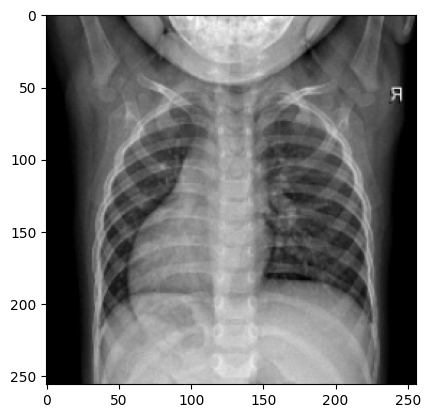

In [33]:
import matplotlib.pyplot as plt
plt.imshow(imgs[4][0].numpy().transpose(1,2,0))

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import pytorch_lightning as pl

class ClassificationModel(pl.LightningModule):
    def __init__(self, num_classes:int = 3, preprocess: DataPreprocess=None, data_transforms:dict=None):
        super().__init__()
        self.preprocess = preprocess
        self.num_classes = num_classes
        self.data_transforms = data_transforms
        self.model = models.resnet18(pretrained=True)
        n_features = self.model.fc.in_features
        self.model.fc = nn.Linear(n_features, num_classes)
        self.sm = nn.Softmax()

    def forward(self,x: torch.Tensor):
        x = self.model(x)
        x = self.sm(x)
        return x

    def vanilla_loss(self, y_hat: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
        loss = nn.CrossEntropyLoss()(y_hat, y)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-4)
        return optimizer

    def train_dataloader(self):
        dataset = ClassificationDataset(self.preprocess.train_data, transform=self.data_transforms['train_transforms'])
        dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4)
        return dataloader
    
    def training_step(self, batch):
        x,y = batch

        y_hat = self.forward(x)
        y = F.one_hot(y, num_classes = self.num_classes).float()
        loss = self.vanilla_loss(y_hat, y)
        self.log('train_loss',loss)
        return loss

    def val_dataloader(self):
        dataset = ClassificationDataset(self.preprocess.val_data, transform=self.data_transforms['val_transforms'])
        dataloader = DataLoader(dataset, batch_size=4, shuffle=False, num_workers=4)
        return dataloader

    def validation_step(self, batch, batch_idx):
        x,y = batch

        y_hat = self.forward(x)
        y = F.one_hot(y, num_classes = self.num_classes).float()
        loss = self.vanilla_loss(y_hat, y)
        self.log('val_loss',loss)
        return loss
    

In [6]:
model = ClassificationModel(3,preprocess=preprocess, data_transforms=data_transforms)

/opt/conda/envs/Monolith/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/envs/Monolith/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.loggers import WandbLogger

wandb_logger = WandbLogger(project='vision-xray')

trainer= pl.Trainer(max_epochs = 10, logger=wandb_logger, callbacks=[EarlyStopping(monitor="val_loss", mode="min", patientce=10)])
trainer.fit(model)

/opt/conda/envs/Monolith/lib/python3.10/site-packages/pytorch_lightning/loggers/wandb.py:395: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/conda/envs/Monolith/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:176: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(

  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 11.2 M
---------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.712    Total estimated model params size (MB)


Epoch 7: 100%|██████████| 225/225 [01:10<00:00,  3.21it/s, loss=0.0626, v_num=vbzo]


In [9]:
a = iter(dataloader)
b= next(a)

In [11]:
out = model(b[0])

In [12]:
out

tensor([[-3.4581,  4.9786, -8.3235],
        [-4.2219, -8.1455,  5.0808]], grad_fn=<AddmmBackward0>)

In [13]:
from lib.metrics.metrics import compute_metrics
compute_metrics(out, b[1])

{'accuracy': 1.0, 'f1_score_micro': 1.0, 'f1_score_macro': 1.0}